In [1]:
import networkx as nx
from copy import deepcopy
import math
import numpy as np
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

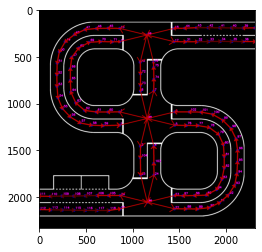

In [3]:
G = nx.read_graphml('test_track.graphml')
import cv2
img=cv2.imread("Test_track.png")
plt.imshow(img)

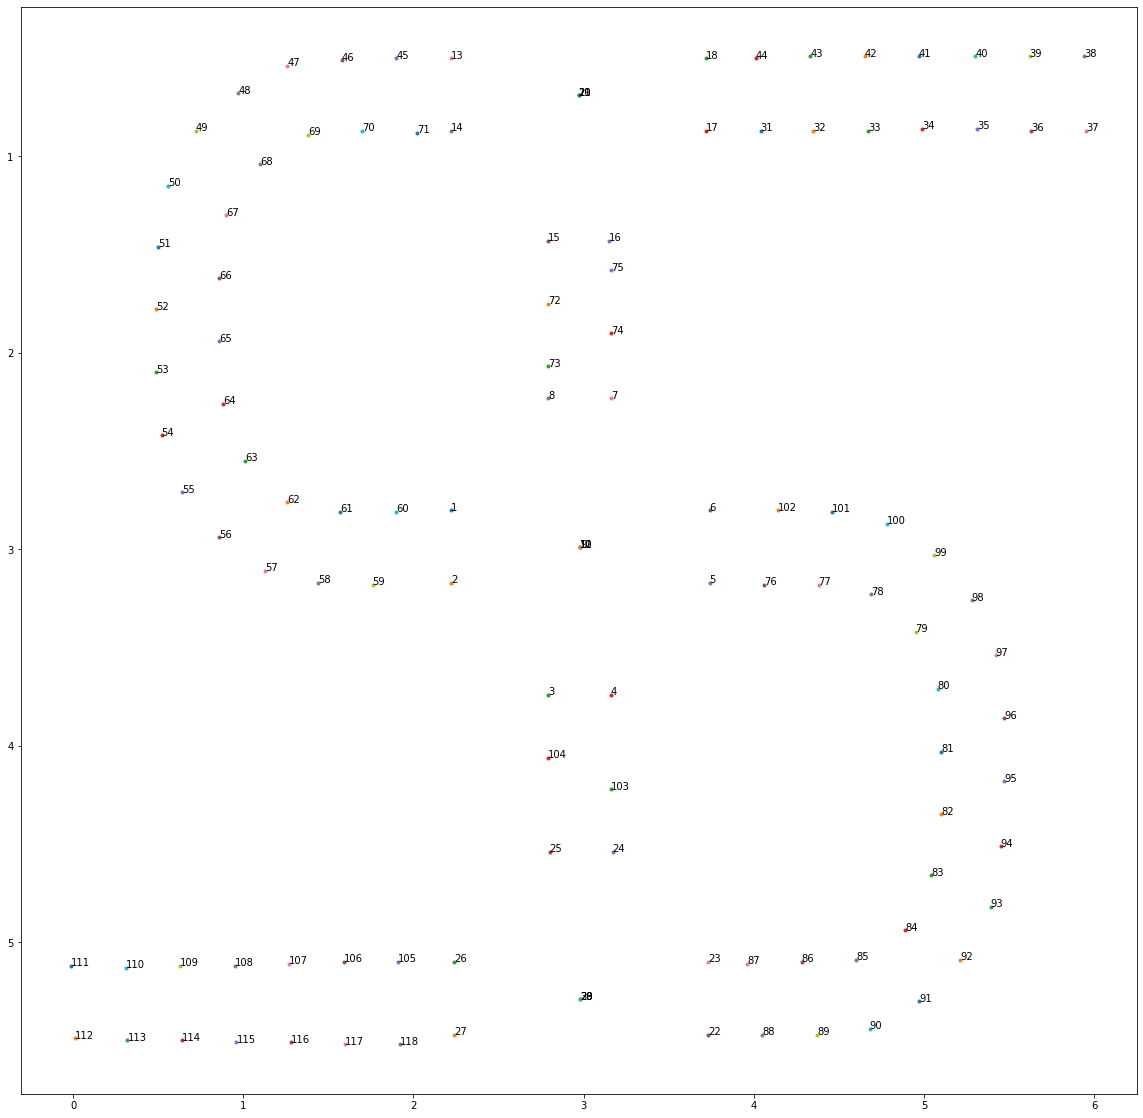

In [4]:
plt.figure(figsize=(20,20))
for node,data in G.nodes(data=True):
    plt.plot(data['x'],data['y'],'.')
    ax = plt.gca()
    ax.annotate(str(node), (data['x'],data['y'])) 

ax = plt.gca()
ax.invert_yaxis()

In [5]:
for i in G.neighbors('112'):
    print(i)

113


In [6]:
for i in G.neighbors('10'):
    print(i)

5
7
1


In [7]:
import heapq

def dijkstra(G, start, target):
    d = {start: 0}
    parent = {start: None}
    pq = [(0, start)]
    visited = set()
    while pq:
        du, u = heapq.heappop(pq)
        if u in visited:
            continue
        if u == target:
            break
        visited.add(u)
        for v  in G.adj[u]:
            if v not in d or d[v] > du + 1:
                d[v] = du + 1
                parent[v] = u
                heapq.heappush(pq, (d[v], v))

    
    fp = [target]
    tg = target
    ptype=[("lk" if len([i for i in G.neighbors(tg)])<2 else "int")]
    
    while tg != start:
        fp.insert(0, parent[tg])
        tg = parent[tg]
        ptype.insert(0,("lk" if len([i for i in G.neighbors(tg)])<2 else "int"))
        # print([i for i in G.neighbors(tg)])
    
    ptyperet=ptype.copy()
    for i in range(len(ptype)):
        if ptype[i]=='int':
            try:
                ptyperet[i-1]="int"
            except:
                pass
            try:
                ptyperet[i+1]="int"
                i+=1
            except:
                pass
    
    edgeret=[]
    
    for i in range(len(fp)-1):
        dt=G.get_edge_data(fp[i],fp[i+1])
        edgeret.append(dt['dotted'])
        
    edgeret.append(None)
        
            
    return fp,ptyperet,edgeret

In [26]:
path_list=dijkstra(G,'103','76')

In [27]:
path_list

(['103', '4', '10', '5', '76'],
 ['lk', 'int', 'int', 'int', 'lk'],
 [False, False, False, False, None])

In [28]:
G.edges('10',data=True)

OutEdgeDataView([('10', '5', {'dotted': False}), ('10', '7', {'dotted': False}), ('10', '1', {'dotted': False})])

In [29]:
node_dict=G.nodes(data=True)

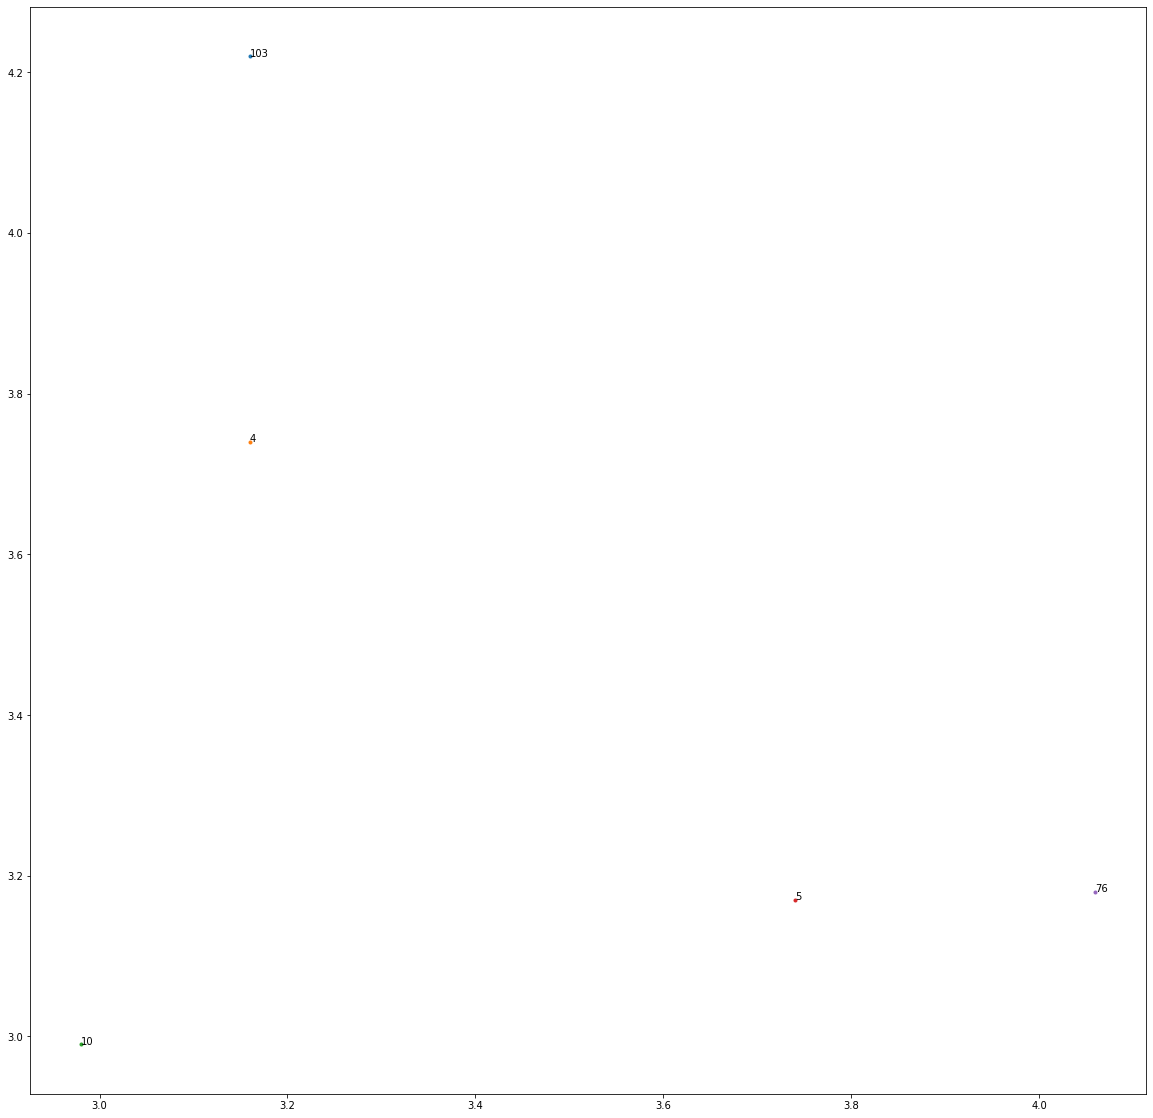

In [30]:
coord_list=[]
plt.figure(figsize=(20,20))
for i in path_list[0]:
    data=node_dict[i]
    plt.plot(data['x'],data['y'],'.')
    coord_list.append([data['x'],data['y']])
    ax = plt.gca()
    ax.annotate(str(i), (data['x'],data['y'])) 

In [31]:
coordlist_new=[]
count=0
countfinal=len(coord_list)
print(countfinal)

while count<countfinal:
    if path_list[1][count]=="int":
            # append first point
        coordlist_new.append(coord_list[count])
        # find midpoint of intersection start and end
        xmidint=(coord_list[count][0]+coord_list[count+2][0])/2
        ymidint=(coord_list[count][1]+coord_list[count+2][1])/2

        xfinmid=(xmidint+coord_list[count+1][0])/2
        yfinmid=(ymidint+coord_list[count+1][1])/2

        coordlist_new.append((xfinmid,yfinmid))
        coordlist_new.append(coord_list[count+2])
        count+=3
    else:
        coordlist_new.append(coord_list[count])
        count+=1

5


In [32]:
coordlist_new

[[3.16, 4.22], [3.16, 3.74], (3.215, 3.2225), [3.74, 3.17], [4.06, 3.18]]

In [33]:
x,y=zip(*coordlist_new)

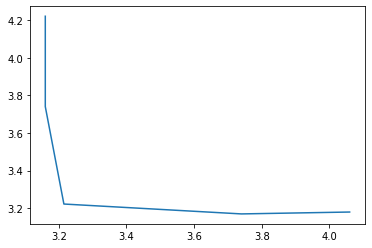

In [34]:
plt.plot(x,y)

In [35]:
x,y=zip(*coord_list)

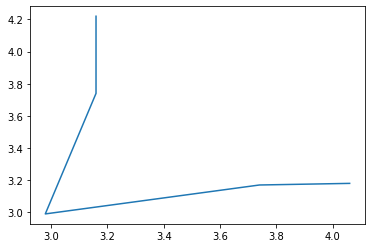

In [36]:
plt.plot(x,y)